**Developer:**

Himanshu Bhavsar

# Building an Image Classifier from Scratch

The main goal of this project is to create an image classifier from scratch using the Keras package. You will create a binary classifier based on an object type of your choice. The classifier will accept images and then predict whether or not a given image contains that object. For example, if you chose your object to be a cat, then the classifier would accept images and predict 1 if it believes there is a cat in the image or a 0 if not. 

You will build and train a classifier in two ways: 
- first using the original data set that you create, and 
- second, using data augmentation techniques. 

## Part 1: Prep Work
### Choose an Object

**You may choose any object other than a cat**. Try to think of an object that is readily available for taking pictures and, preferably, outdoors, as that will add to the natural variability to the data.

### Create a Dataset

Take 80 pictures of the chosen object and 80 pictures of other things that are not your object. Each group member should supply a roughly equal number of pictures so as to increase variability in your dataset. 

From these 160 images you will create a training set (50 object/50 not object), a validation set (15 object/15 not object), and a test set (15 object/15 not object).

It's best if your dataset is diverse, so take pictures of the chosen **object** with, for example, different lighting, from different angles, different distances from camera, different examples of the same type of object. Similarly for the **not object** images: try to include a variety of objects in different ways. 

## Part 2: Using the Original Data

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in `train`, `validation`, and `test` folders. 

### Dataset Loading and Processing with Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

You should then use the training data generator to print out some examples of the training images and corresponding labels. 

### Create and Evaluate a Model

Build a convolutional neural network and use the validation loss and accuracy to select the best architecture and hyperparameters so that you can maximize the validation accuracy. 

Any overfitting should be addressed; that is, if your model begins overfitting after epoch 3, you should not quote validation accuracy after epoch 15. And, appropriate attempts should be made to reduce/eliminate the overfitting to improve overall model generalizability. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

Datastructure: ['test', 'train', 'validation']


Folder " test " contains the following folders: ['not_object', 'object']
Folder " not_object " contains 15 images
Folder " object " contains 15 images


Folder " train " contains the following folders: ['not_object', 'object']
Folder " not_object " contains 50 images
Folder " object " contains 50 images


Folder " validation " contains the following folders: ['not_object', 'object']
Folder " not_object " contains 15 images
Folder " object " contains 15 images


Total images:  160


For train images:
Found 100 images belonging to 2 classes.


For validation images:
Found 30 images belonging to 2 classes.


For test images:
Found 30 images belonging to 2 classes.


The shape of image array (batch, height, width, channel):  (5, 148, 148, 3)


The label array:  [1. 0. 0. 1. 1.]


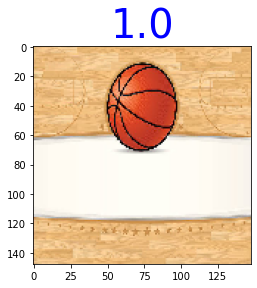

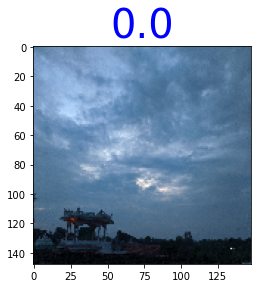

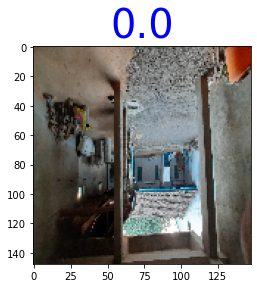

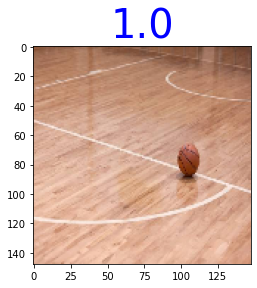

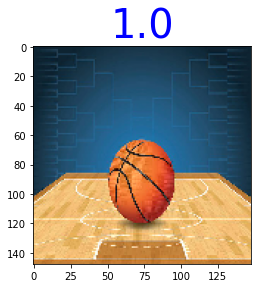

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 74, 74, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 128)       7

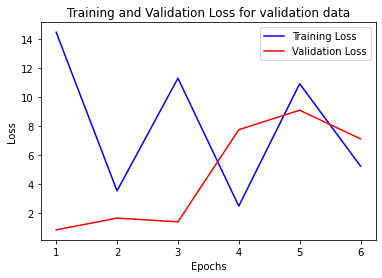

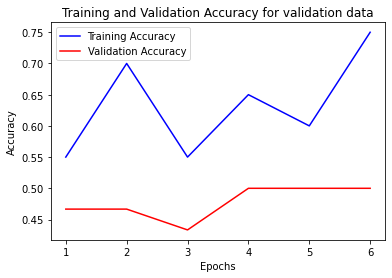

In [1]:
#importing libraries
import os, os.path
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, BatchNormalization, MaxPooling2D, Dropout
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from IPython.display import Image, display


#Dataset verification

#storing main data folder path to variable data_path
data_path = Path("C:\\Users\\Himanshu\\Documents\\SEM 3 notebooks\\ML2_notebooks\\Lab 4\\data")

#verifying the data folder has train, test and validation folders
dir_list = os.listdir(data_path)
print("Datastructure:", dir_list)
print("\n")

#verifying subfolders and their contents 

#looping over data folder that contains test, train, validate folders
for dir in dir_list:
    path = os.path.join(data_path, dir)
    #storing the subfolders not_object, object in subpath variable
    subpath = os.listdir(path)
    print("Folder \"" , dir, "\" contains the following folders:", subpath)
    for spath in subpath:
        print("Folder \"", spath, "\" contains", len(os.listdir(os.path.join(path, spath))), "images")
    print("\n")
    
#getting total images by using os.walk function
total = 0
for root, dirs, files in os.walk(data_path):
    total += len(files)    
print("Total images: ", total)

print("\n")

#Dataset Loading and Processing with Image Data Generators

#generating train, test, validate generator
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

print("For train images:")
#applying the generator on the training images with resize and rescaling images
train_generator = train_datagen.flow_from_directory(os.path.join(data_path, "train"), target_size=(148, 148), color_mode='rgb',
                                                    batch_size=5,classes=['not_object', 'object'], 
                                                    class_mode='binary', shuffle=True)
print("\n")
print("For validation images:")
#applying the generator on the training images with resize and rescaling images
validation_generator = test_datagen.flow_from_directory(os.path.join(data_path, "validation"), target_size=(148, 148), 
                                                        batch_size=5, classes=['not_object', 'object'], 
                                                        class_mode='binary', shuffle=True)
print("\n")
print("For test images:")
#applying the generator on the training images with resize and rescaling images
test_generator = test_datagen.flow_from_directory(os.path.join(data_path, "test"), target_size=(148, 148), batch_size=1, 
                                                    classes=['not_object', 'object'], class_mode='binary', shuffle=False)

#Printing some sample images along with their labels
x,y = next(train_generator) #storing the images and labels data in x and y respectively using the next() function
print("\n")
print("The shape of image array (batch, height, width, channel): ", x.shape)
print("\n")
print("The label array: ", y) #printing the label array to verify 

i = 0
for img in x: #iterating over the items in the image array 'x' 
    #plotting images from the first batch
    plt.title(label=y[i], fontsize=40, color="blue") 
    plt.imshow(img)
    plt.show()
    i += 1
    
#Create and evaluate a model

#creating a Convolution neural network and storing it in variable model
model = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(148,148,3)),
  BatchNormalization(),      
  MaxPooling2D(pool_size=(2,2)),
  
  Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),  
  
  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  BatchNormalization(),
  MaxPooling2D(pool_size=(2,2)),
    
  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
  BatchNormalization(),
    
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')

])

#getting model summary
model.summary()

#compiling the model
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#fitting the model using validation data
history = model.fit(train_generator, epochs=6, steps_per_epoch=len(train_generator) / 5, 
                    validation_data=validation_generator, verbose=1)

print("\n")

#Reporting final test accuracy

#evaluating model
test_step_size = test_generator.n // test_generator.batch_size #getting step size
test_loss, test_acc = model.evaluate(test_generator, steps=test_step_size)

print("Test accuracy: ", test_acc)

print("\n")

#plotting the validation loss and accuracy
history_dict = history.history # the dictionary that has the information on loss and accuracy per epoch
loss_values = history_dict['loss']   # training loss
val_loss_values = history_dict['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# plot for loss
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss for validation data")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\n")

#plot for accuracy
acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy for validation data")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n")

## Part 3: Using Data Augmentation

### Dataset Verification

You should verify that the training, validation, and test sets have the correct number of images (the `os` functions should help with this) and that the data is organized in a folder structure that will work with your image data generators. 

### Dataset Loading and Processing with Create Image Data Generators

You should now create image data generators for your training, validation, and test datasets that will allow you to feed them into your model in batches. The images should be resized to 148x148 pixels and scaled so all pixel values are between 0 and 1. 

### Add Data Augmentation 

You should now add data augmentation to your training data generator. All available types of augmentation should be used. 

Print an image and examples of the same image augmented in different ways. (The `.load_img()` and [`.flow()` method](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#flow) may be helpful here.)

### Create and Evaluate a Baseline Model

Use the best model from **Part 2** to train with the augmented data and evaluate on the validation data to get a baseline accuracy for the new model trained on the augmented dataset. 

### Tune the Model

With a more complex training set, you may be able to improve the accuracy through adjustments to the baseline model architecture and tuning the hyperparameters. 

### Report Accuracy on Test Set 

Your final step is to make predictions using the test set and report the final test set accuracy. 

Folder " test " contains the following folders: ['not_object', 'object']
Folder " not_object " contains 15 images
Folder " object " contains 15 images


Folder " train " contains the following folders: ['not_object', 'object']
Folder " not_object " contains 50 images
Folder " object " contains 50 images


Folder " validation " contains the following folders: ['not_object', 'object']
Folder " not_object " contains 15 images
Folder " object " contains 15 images


Total images:  160


Using the image generators that we obtained in Part 2


Starting image augmentation....


Displaying the orignal image:


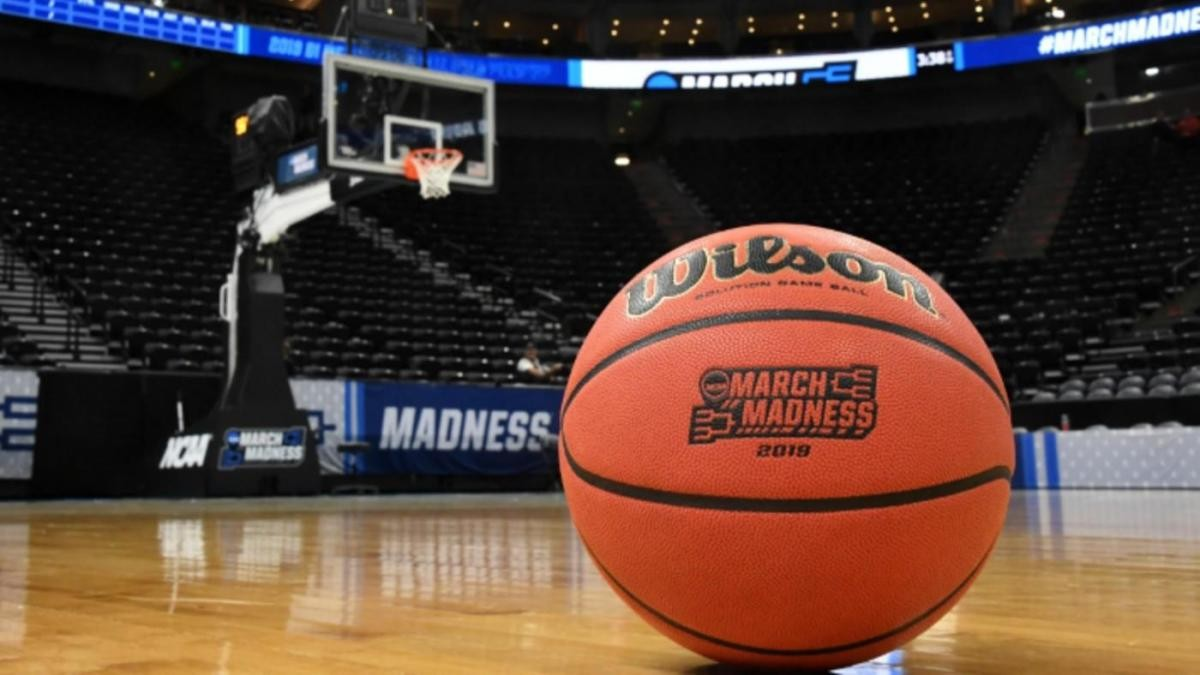



Displaying the augmented images:


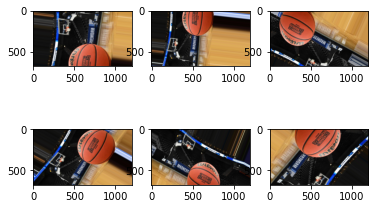



For training images:
Found 100 images belonging to 2 classes.


Epoch 1/6
4/4 [==============================] - 2s 516ms/step - loss: 0.3739 - accuracy: 0.8000 - val_loss: 1.3753 - val_accuracy: 0.4000
Epoch 2/6
4/4 [==============================] - 4s 913ms/step - loss: 6.0149 - accuracy: 0.5500 - val_loss: 20.1604 - val_accuracy: 0.5000
Epoch 3/6
4/4 [==============================] - 4s 957ms/step - loss: 0.7435 - accuracy: 0.6500 - val_loss: 17.2637 - val_accuracy: 0.5000
Epoch 4/6
4/4 [==============================] - 4s 948ms/step - loss: 1.0677 - accuracy: 0.5000 - val_loss: 1.1842 - val_accuracy: 0.5333
Epoch 5/6
4/4 [==============================] - 4s 1s/step - loss: 0.5198 - accuracy: 0.8000 - val_loss: 1.2901 - val_accuracy: 0.5000
Epoch 6/6
6/6 [==============================] - 1s 188ms/step - loss: 1.4179 - accuracy: 0.5000
Validation accuracy: 0.5


Training the newly tuned model on the augmented dataset:


Model: "sequential_3"
___________________________________

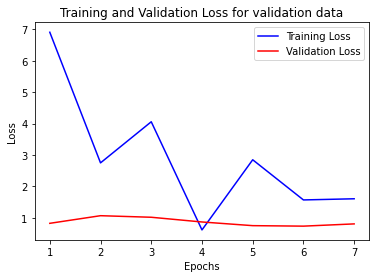

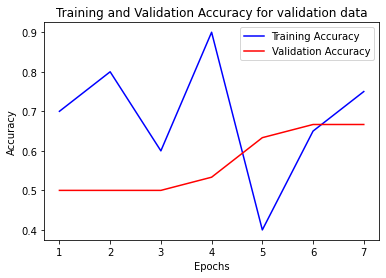

In [4]:
#dataset verification

#looping over data folder that contains test, train, validate folders
for dir in dir_list:
    path = os.path.join(data_path, dir)
    #storing the subfolders not_object, object in subpath variable
    subpath = os.listdir(path)
    print("Folder \"" , dir, "\" contains the following folders:", subpath)
    for spath in subpath:
        print("Folder \"", spath, "\" contains", len(os.listdir(os.path.join(path, spath))), "images")
    print("\n")
    
#getting total images by using os.walk function
total = 0
for root, dirs, files in os.walk(data_path):
    total += len(files)    
print("Total images: ", total)

print("\n")

print("Using the image generators that we obtained in Part 2")
print("\n")
print("Starting image augmentation....")
print("\n")

#image augmentaion

#setting the image path variable
img_path="C:\\Users\\Himanshu\\Documents\\SEM 3 notebooks\\ML2_notebooks\\Lab 4\\data\\train\\object\\7.jpg"
print("Displaying the orignal image:")
#displaying the orignal image
display(Image(filename=img_path, width = 200, height = 200))

print("\n")

#data augmentation
img = load_img(img_path)

# convert to numpy array
data = img_to_array(img)

# expand dimension to one sample
samples = expand_dims(data, 0)

# create image data augmentation generator
img_gen = ImageDataGenerator(rotation_range=90, 
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2, 
                             zoom_range=0.2,
                             horizontal_flip=True, 
                             vertical_flip=True, 
                             rescale=1./255,
                             fill_mode='nearest'
                            )
# prepare iterator
img_train = img_gen.flow(samples, batch_size=1)
print("Displaying the augmented images:")
# generate samples and plot
for i in range(6):
    # define subplot
    plt.subplot(230 + 1 + i)
    # generate batch of images
    batch = img_train.next()
    # convert to unsigned integers for viewing
    image = batch[0]
    # plot raw pixel data
    plt.imshow(image)
# show the figure
plt.show()


#training with augmented data and creating a baseline model
print("\n")

print("For training images:")
#applying the augmented generator on the training images with resizing and rescaling images
train_generator_aug = img_gen.flow_from_directory(os.path.join(data_path, "train"), target_size=(148, 148), color_mode='rgb',
                                                    batch_size=5, classes=['not_object', 'object'], 
                                                    class_mode='binary', shuffle=True)
print("\n")
#creating a baseline model and fitting with the model obtained in part 2
base_hist_aug = model.fit(train_generator_aug, epochs=6, steps_per_epoch=len(train_generator_aug) / 5, 
                    validation_data=validation_generator, verbose=1)

val_step_size = validation_generator.n // validation_generator.batch_size
val_loss, val_acc = model.evaluate(validation_generator, steps=val_step_size)
print("Validation accuracy:", val_acc)

print("\n")
print("Training the newly tuned model on the augmented dataset:")
print("\n")

#improving accuracy by tuning the model

model_new = Sequential([
  Conv2D(filters=32, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(148,148,3)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
  Conv2D(filters=64, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
  Conv2D(filters=128, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
  Conv2D(filters=128, kernel_size=(3, 3), padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.2),
    
  Flatten(),
  Dense(128, activation='relu'),
  Dense(1, activation='sigmoid')

])

#getting model summary
model_new.summary()

#compiling the model
model_new.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

#fitting the model using validation data
history_2 = model_new.fit(train_generator_aug, epochs=7, steps_per_epoch=len(train_generator_aug) / 5, 
                    validation_data=validation_generator, verbose=1)

print("\n")

#Reporting final test accuracy

test_step_size = test_generator.n // test_generator.batch_size
test_loss, test_acc = model_new.evaluate(test_generator, steps=test_step_size)

print("Test set accuracy:", test_acc)

print("\n")

#plotting the validation loss and accuracy
history_dict_2 = history_2.history # the dictionary that has the information on loss and accuracy per epoch
loss_values = history_dict_2['loss']   # training loss
val_loss_values = history_dict_2['val_loss'] # validation loss

epochs = range(1, len(loss_values)+1)  #creates list of integers to match the number of epochs of training

# plot for loss
plt.plot(epochs, loss_values, 'b', label="Training Loss")
plt.plot(epochs, val_loss_values, 'r', label="Validation Loss")
plt.title("Training and Validation Loss for validation data")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Loss")
plt.legend()
plt.show()

print("\n")

#plot for accuracy
acc_values = history_dict_2['accuracy']
val_acc_values = history_dict_2['val_accuracy']

plt.plot(epochs, acc_values, 'b', label="Training Accuracy")
plt.plot(epochs, val_acc_values, 'r', label="Validation Accuracy")
plt.title("Training and Validation Accuracy for validation data")
plt.xlabel("Epochs")
plt.xticks(epochs)
plt.ylabel("Accuracy")
plt.legend()
plt.show()

print("\n")

**Conclusion**

- In part 1 we have created the data tree as follows:
- data
    - test
        - not_object (15 images)
        - object (15 images)
    - train
        - not_object (50 images)
        - object (50 images)
    - validation
        - not_object (15 images)
        - object (15 images)

- Total 160 images

- In part 2 we have created and trained the model on the train set and after validation we have evaluated it on the test set.
After evaluation we got a test accuracy of **53%**

- In part 3 we have have created an ImageGenerator and used the following attributes: **rotation_range=90, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, vertical_flip=True, rescale=1./255, fill_mode='nearest'**. 
- After applying this to a sample image we can see the different ways the data is augmented.
- This image generator is then applied to the model from part 2 to get the validation accuracy. This did not change the accuracy level significantly. We decided to keep epochs to 6 as we noticed the model starts to overfit after that
- After tuning the model we have then applied this model to the augmented data and got the test accuracy of **60%** which is **10** points higher than the orignal accuracy.
